In [6]:
import tensorflow as tf
print(tf.__version__)



2.9.0


In [7]:
pip install keras


Note: you may need to restart the kernel to use updated packages.


In [8]:
import keras

In [19]:
import pandas as pd 
import numpy as np
import os  
os.chdir('Downloads')

In [15]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from keras.preprocessing.image import ImageDataGenerator

In [20]:
train = pd.read_csv('train.csv')

In [21]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
test = pd.read_csv('test.csv')

In [23]:
test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


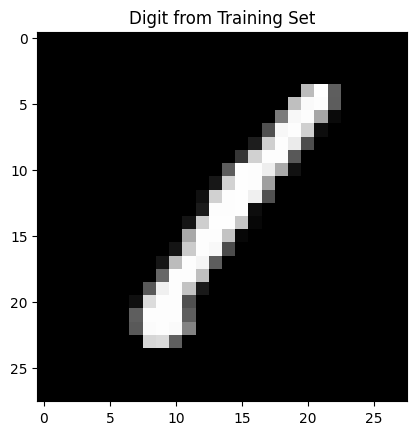

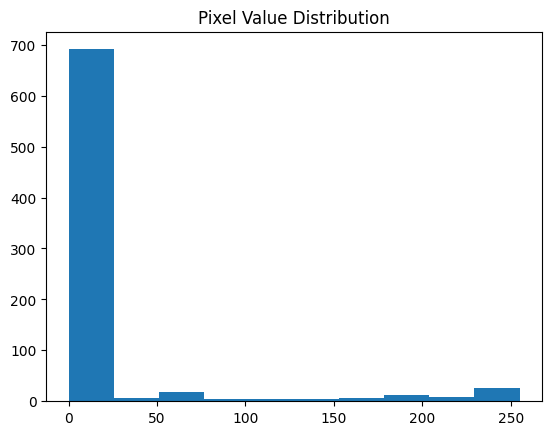

In [24]:
# Visualizing a single digit from the training set
number = np.array(train.iloc[0, 1:]).reshape(28, 28)
plt.imshow(number, cmap='gray')
plt.title("Digit from Training Set")
plt.show()

# Checking distribution of pixel values for a specific digit
arr = train.iloc[3, 1:]
plt.hist(arr, bins=10)
plt.title("Pixel Value Distribution")
plt.show()



Predicted digit: 4


C:\Users\nixty\AppData\Local\Temp\ipykernel_26716\4214374893.py:32: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  predicted_digit = int(knn.predict(X_test[60].reshape(1, -1)))


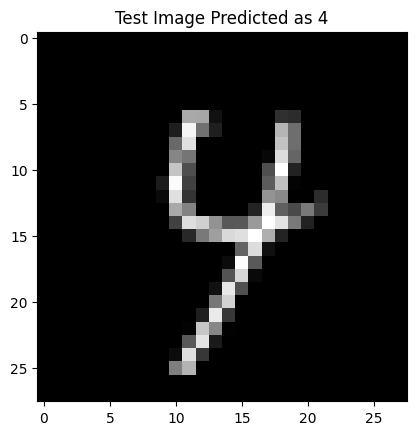

In [25]:
# Feature Extraction
X = np.array(train.iloc[:, 1:])
Y = np.array(train.iloc[:, 0])
X_test = np.array(test)

# Data Preprocessing - Reshape data for KNN
X_train = X.reshape(-1, 28, 28, 1)

# Data Augmentation
datagen = ImageDataGenerator(
    rotation_range=15,
    height_shift_range=0.1,
    zoom_range=0.1,
    shear_range=0.1,
)
datagen.fit(X_train)

# Flattening the images back for KNN
X_train_flat = X_train.reshape(-1, 784)

# Split the data into train and validation sets
X_train_split, X_val_split, Y_train_split, Y_val_split = train_test_split(X_train_flat, Y, test_size=0.2, random_state=42)

# Model Training - K-Nearest Neighbors (KNN)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_split, Y_train_split)

# Prediction on Validation Set
val_pred = knn.predict(X_val_split)

# Checking the prediction on a specific test image
predicted_digit = int(knn.predict(X_test[60].reshape(1, -1)))
print(f"Predicted digit: {predicted_digit}")

# Visualizing the corresponding test image
num = np.array(test.iloc[60, :]).reshape(28, 28)
plt.imshow(num, cmap='gray')
plt.title(f"Test Image Predicted as {predicted_digit}")
plt.show()



In [26]:
# Final Prediction on the entire Test Set
test_predictions = knn.predict(X_test)

# Model Evaluation - You can use different metrics for evaluation on validation data.
from sklearn.metrics import accuracy_score, classification_report

accuracy = accuracy_score(Y_val_split, val_pred)
print(f"Validation Accuracy: {accuracy}")

print("Classification Report:")
print(classification_report(Y_val_split, val_pred))

Validation Accuracy: 0.9648809523809524
Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       816
           1       0.94      1.00      0.97       909
           2       0.99      0.94      0.96       846
           3       0.96      0.96      0.96       937
           4       0.98      0.97      0.98       839
           5       0.96      0.95      0.96       702
           6       0.97      0.99      0.98       785
           7       0.96      0.96      0.96       893
           8       0.99      0.93      0.96       835
           9       0.94      0.95      0.95       838

    accuracy                           0.96      8400
   macro avg       0.97      0.96      0.96      8400
weighted avg       0.97      0.96      0.96      8400

